<a href="https://colab.research.google.com/github/Nlasry1996/Nautica-Home/blob/main/FamilyItemPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
! git clone https://github.com/Nlasry1996/Nautica-Home.git # Connect to Github


fatal: destination path 'Nautica-Home' already exists and is not an empty directory.


#Load Data

In [ ]:
import numpy as np
import pandas as pd
df= pd.read_csv('/content/Nautica-Home/NHDataset - NHDataset.csv')
df

,Order_Date,Customer_ID,Order_ID,Quantity,City,District,Catalog_Number,Hebrew_Description,English_Description,Added_Date,Family_Item_ID,Family_Item_Name,Sales_Price_No_VAT,Sales_Price_With_VAT,Cost_Price,Cost_Import_USD,Cost_Production_USD,Size,Color_ID,Color_Name
0,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHD1001-15-2,ינג כחול כיסוי 100% כותנה במילוי מיקרופייבר 40...,400GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,427,499,15,0,0,150/200,2,PAGEANT BLUE
1,4/3/2022,100110,SO22000098,3,Ir ha-Karmel,חיפה,NHD1002-15-2,שמיכת פוך פייפינג כיסוי 100% כותנה מיקרופייבר ...,600GSM PREMIUM MICROFIBER BLANKET BLUE PIPING 15,5/31/2021,שמיכות,שמיכות,469,549,17,0,0,150/200,2,PAGEANT BLUE
2,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3004-15-16,מגבת גוף אפור כהה 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,16,Bruschetta
3,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3005-15-26,מגבת גוף טורקיז 100% כותנה 600 גר' 90/150,Body towel 100% cotton Aqua Fibro 600 gsm 90x150,5/31/2021,מגבות,מגבות אקווה פיברו,196,229,10,0,0,90/150,26,Peach Bud
4,4/3/2022,100110,SO22000098,1,Ir ha-Karmel,חיפה,NHT3006-15-23,מגבת פסים 150X90 כחול 600 גר',STRIPE TOWEL 150X90 BLUE 600 GSM,12/15/2021,מגבות,מגבות אקווה פיברו,213,249,10,0,0,150/90,23,China Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9156,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71002M8,OCEAN M Mix&Match women tank,"Mix&Match women tank,,M",11/10/2021,7000,Loungewear,102,119,5,0,5,M,8,Lolipop
9157,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L6,-PEACH-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,6,Cartouch
9158,4/30/2023,103230,SO23001622,1,Ashdod,דרום,NLW-71003L8,-OCEAN-L-Mix&Match women shorts,NaN,10/27/2021,7000,Loungewear,110,129,5,0,5,L,8,Lolipop
9159,4/30/2023,103231,SO23001624,1,Kiryat-Motzkin,חיפה,NHB1006-16-13,"סט 100% כותנה סטן 220 160 סמ BASIC L. BLUE""",NaN,3/1/2022,220B,סאטן 220 בסיק,512,599,28,28,0,160/200,13,L. PINK


Delete unrelevant columns

In [ ]:
df=df.drop(['Added_Date','Customer_ID','City',	'District','Hebrew_Description','English_Description','Cost_Import_USD'	,'Cost_Production_USD','Size','Color_ID','Color_Name','Sales_Price_With_VAT','Sales_Price_No_VAT','Cost_Price'], axis=1)

df

,Order_Date,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name
0,4/3/2022,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות
1,4/3/2022,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות
2,4/3/2022,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו
3,4/3/2022,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו
4,4/3/2022,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו
...,...,...,...,...,...,...
9156,4/30/2023,SO23001622,1,NLW-71002M8,7000,Loungewear
9157,4/30/2023,SO23001622,1,NLW-71003L6,7000,Loungewear
9158,4/30/2023,SO23001622,1,NLW-71003L8,7000,Loungewear
9159,4/30/2023,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק


# Convert Data


Convert Date to DateType


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date']) # Convert 'Order_Date' to a datetime format.
df['Month'] = df['Order_Date'].dt.month #Extract the month feature.
df=df.drop(['Order_Date'], axis=1)
df

,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name,Month
0,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות,4
1,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות,4
2,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו,4
3,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו,4
4,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו,4
...,...,...,...,...,...,...
9156,SO23001622,1,NLW-71002M8,7000,Loungewear,4
9157,SO23001622,1,NLW-71003L6,7000,Loungewear,4
9158,SO23001622,1,NLW-71003L8,7000,Loungewear,4
9159,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק,4


Insert in the Table 3 Derive Features

In [ ]:
#Count the number of times this article was bought
df_catalognumber_orders = df.groupby('Catalog_Number')['Order_ID'].count().reset_index()
df_catalognumber_orders = df_catalognumber_orders.rename(columns={'Order_ID': 'QuantitySold_per_Article_per_Year'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_catalognumber_orders, on='Catalog_Number', how='left')
#Count of how many article were sell in this Item Family
df_family_item_orders = df.groupby('Family_Item_Name')['Order_ID'].count().reset_index()
df_family_item_orders = df_family_item_orders.rename(columns={'Order_ID': 'QuantitySold_per_FI_per_Year'})
# Merge the derived feature back into the original DataFrame
df = pd.merge(df, df_family_item_orders, on='Family_Item_Name', how='left')
#How many of these items are sold by month
df['Quantity_per_FI_per_Month'] = df.groupby(['Month', 'Family_Item_ID'])['Order_ID'].transform('count')
#How many people bought per month
df['Total_Customers_per_Month']= df.groupby('Month')['Order_ID'].transform('count')
df

,Order_ID,Quantity,Catalog_Number,Family_Item_ID,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month
0,SO22000098,1,NHD1001-15-2,שמיכות,שמיכות,4,58,371,36,1110
1,SO22000098,3,NHD1002-15-2,שמיכות,שמיכות,4,65,371,36,1110
2,SO22000098,1,NHT3004-15-16,מגבות,מגבות אקווה פיברו,4,29,984,140,1110
3,SO22000098,1,NHT3005-15-26,מגבות,מגבות אקווה פיברו,4,33,984,140,1110
4,SO22000098,1,NHT3006-15-23,מגבות,מגבות אקווה פיברו,4,19,984,140,1110
...,...,...,...,...,...,...,...,...,...,...
9156,SO23001622,1,NLW-71002M8,7000,Loungewear,4,13,2786,248,1110
9157,SO23001622,1,NLW-71003L6,7000,Loungewear,4,5,2786,248,1110
9158,SO23001622,1,NLW-71003L8,7000,Loungewear,4,3,2786,248,1110
9159,SO23001624,1,NHB1006-16-13,220B,סאטן 220 בסיק,4,10,618,78,1110


Drop unrelevant columns

In [ ]:
df=df.drop(['Order_ID','Catalog_Number','Family_Item_ID'],axis=1)
df

,Quantity,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month
0,1,שמיכות,4,58,371,36,1110
1,3,שמיכות,4,65,371,36,1110
2,1,מגבות אקווה פיברו,4,29,984,140,1110
3,1,מגבות אקווה פיברו,4,33,984,140,1110
4,1,מגבות אקווה פיברו,4,19,984,140,1110
...,...,...,...,...,...,...,...
9156,1,Loungewear,4,13,2786,248,1110
9157,1,Loungewear,4,5,2786,248,1110
9158,1,Loungewear,4,3,2786,248,1110
9159,1,סאטן 220 בסיק,4,10,618,78,1110


Label Encoder for FamilyItemName

In [ ]:
from sklearn.preprocessing import LabelEncoder # Encode Categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Family_Item_Name'] = label_encoder.fit_transform(df['Family_Item_Name'])

df

,Quantity,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month
0,1,15,4,58,371,36,1110
1,3,15,4,65,371,36,1110
2,1,4,4,29,984,140,1110
3,1,4,4,33,984,140,1110
4,1,4,4,19,984,140,1110
...,...,...,...,...,...,...,...
9156,1,1,4,13,2786,248,1110
9157,1,1,4,5,2786,248,1110
9158,1,1,4,3,2786,248,1110
9159,1,10,4,10,618,78,1110


# Correlation and Trend


Check Corellation

In [ ]:
df.corr()

,Quantity,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month
Quantity,1.000000,0.083071,0.011745,0.037236,-0.177185,-0.126853,-0.023945
Family_Item_Name,0.083071,1.000000,0.194402,0.125043,-0.731806,-0.472360,-0.056866
Month,0.011745,0.194402,1.000000,0.143433,-0.290608,-0.417169,-0.046084
QuantitySold_per_Article_per_Year,0.037236,0.125043,0.143433,1.000000,-0.304325,-0.218558,-0.035058
QuantitySold_per_FI_per_Year,-0.177185,-0.731806,-0.290608,-0.304325,1.000000,0.657557,0.071119
Quantity_per_FI_per_Month,-0.126853,-0.472360,-0.417169,-0.218558,0.657557,1.000000,0.433566
Total_Customers_per_Month,-0.023945,-0.056866,-0.046084,-0.035058,0.071119,0.433566,1.000000


Load Table

In [ ]:
# Create the new table by grouping and summing the 'Family_Item_Count_Monthly' column
summary_table = df.groupby(['Family_Item_Name', 'Month'])['Quantity_per_FI_per_Month'].count().reset_index()

# Display the summary table
print(summary_table)

     Family_Item_Name  Month  Quantity_per_FI_per_Month
0                   0      1                          2
1                   0      2                         16
2                   0      3                          3
3                   0      4                          3
4                   0      6                          2
..                ...    ...                        ...
176                16      8                         20
177                16      9                         18
178                16     10                          4
179                16     11                         26
180                16     12                          9

[181 rows x 3 columns]


Graph to check Trend

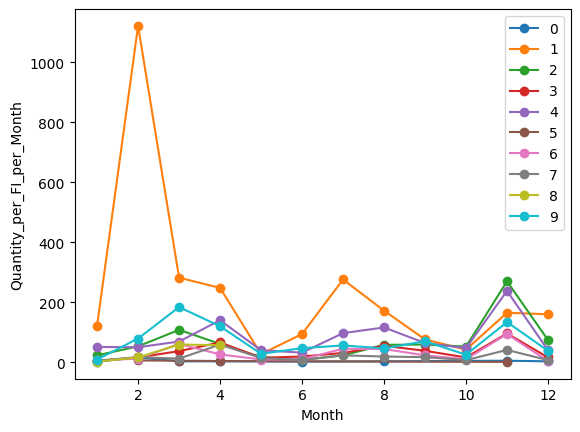

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map each family item to a unique color
family_colors = {item: color for item, color in zip(summary_table['Family_Item_Name'].unique(), plt.cm.tab10.colors)}

# Plot the graph
fig, ax = plt.subplots()

# Iterate through each family item in the summary table
for item, color in family_colors.items():
    # Filter the summary table for the specific family item
    data = summary_table[summary_table['Family_Item_Name'] == item]

    # Plot the data points for the family item with the corresponding color
    ax.plot(data['Month'], data['Quantity_per_FI_per_Month'], marker='o', label=item, color=color)

# Set the x-axis label and tick labels
ax.set_xlabel('Month')

# Set the y-axis label and tick labels
ax.set_ylabel('Quantity_per_FI_per_Month')

# Set the legend
ax.legend()

# Show the graph
plt.show()


# Regression

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop('Quantity_per_FI_per_Month', axis=1).values  # independent variable
y = df['Quantity_per_FI_per_Month'].values  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X, y)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", predictions)

Coefficients: [ -8.91273267   0.53725438 -22.27728816  -0.04958462   0.18663266
   0.26727178]
Intercept: -140.94344959447045
Predictions: [ 24.62742775 249.56462155 402.55259534 ... 729.95607296 403.2304539
 -41.53850255]


Model Estimation

In [ ]:
from sklearn.metrics import *
mse = mean_squared_error(y_test, predictions)
mae=mean_absolute_error(y_test, predictions)
MAE=median_absolute_error(y_test, predictions)
score = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Square:",np.sqrt(mse))
print("Mean Absolute Error:",mae)
print("Median Absolute Error",MAE)
print("score:",score)



Mean Squared Error: 42167.24672121314
Root Mean Square: 205.3466501338971
Mean Absolute Error: 161.91362708441582
Median Absolute Error 113.0980065378663
score: 0.6353858711017875


# XGBOOST

Predictions on the test set

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop(['Quantity_per_FI_per_Month'], axis=1)
y = df['Quantity_per_FI_per_Month']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the XGBoost regression model
model = xgb.XGBRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)


[ 115.88478   184.05249   171.9824   ... 1122.0134    275.89993
   46.984028]


Predict all the values of our Dataset

In [ ]:
all_pred=model.predict(X).round()
print(all_pred)
df.insert(loc=7,column='Predictions_FI',value=all_pred)
df

[ 36.  36. 140. ... 248.  78.  78.]


,Quantity,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month,Predictions_FI
0,1,15,4,58,371,36,1110,36.0
1,3,15,4,65,371,36,1110,36.0
2,1,4,4,29,984,140,1110,140.0
3,1,4,4,33,984,140,1110,140.0
4,1,4,4,19,984,140,1110,140.0
...,...,...,...,...,...,...,...,...
9156,1,1,4,13,2786,248,1110,248.0
9157,1,1,4,5,2786,248,1110,248.0
9158,1,1,4,3,2786,248,1110,248.0
9159,1,10,4,10,618,78,1110,78.0


Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
MAE=median_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Square:",np.sqrt(mse))
print("Mean Absolute Error:",mae)
print("Median Absolute Error",MAE)
print("score:",score)

Mean Squared Error: 0.1933495741399452
Root Mean Square: 0.43971533307350696
Mean Absolute Error: 0.17205944122412267
Median Absolute Error 0.05869293212890625
score: 0.9999983281339896


Graph

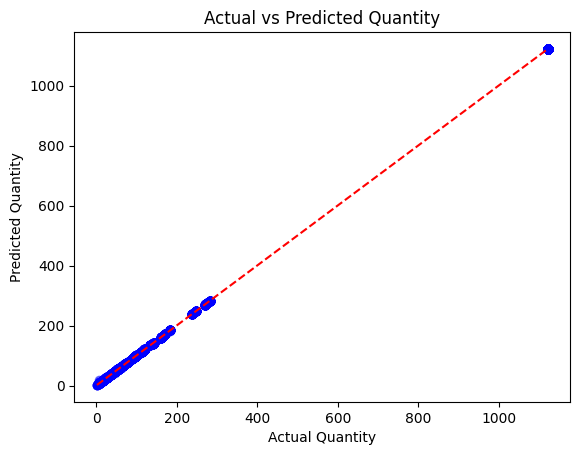

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.show()

# Cross Validation


Cross-Validation using K-Fold Method

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Splitting the data into features (X) and target variable (y)
X = df.drop(['Quantity_per_FI_per_Month'], axis=1)
y = df['Quantity_per_FI_per_Month']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over each fold
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Creating the XGBoost regression model
    model = XGBRegressor()

    # Train your model on the training data
    model.fit(X_train, y_train)

    # Evaluate your model on the validation data
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred)

    # Store the evaluation score
    scores.append(score)

# Calculate the average score
average_score = np.mean(scores)

# Print the average score
print("Average Mean Squarred Error", average_score)


Average Mean Squarred Error 0.7498548096614879


Visualization of trainig set and testing set foe each feature

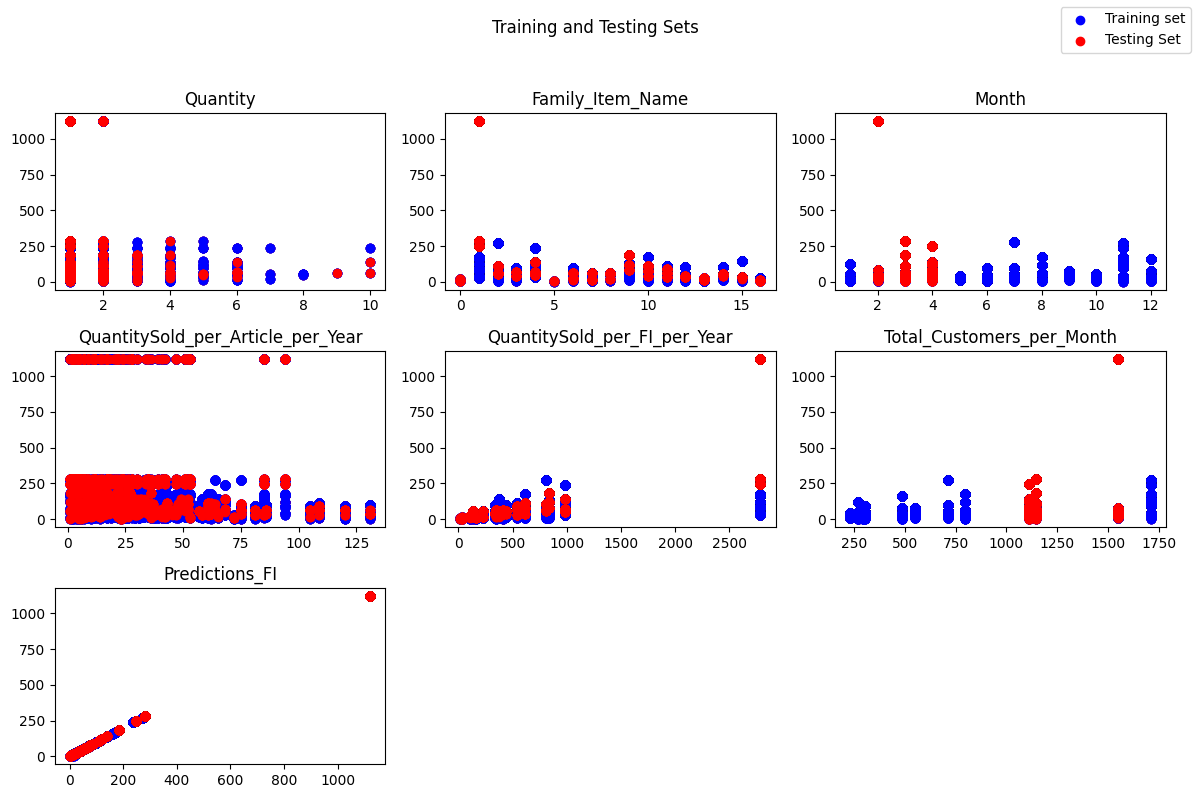

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = df.drop(['Quantity_per_FI_per_Month'], axis=1)
y = df['Quantity_per_FI_per_Month']

# Define the number of folds
k = 5

# Create an instance of KFold with k folds
kf = KFold(n_splits=k)

# Determine the number of features
num_features = X.shape[1]

# Calculate the number of subplot rows and columns
num_rows = int(np.ceil(np.sqrt(num_features)))
num_cols = int(np.ceil(num_features / num_rows))

# Initialize the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Iterate over each feature
    for i, col in enumerate(X.columns):
        # Plot the training set
        axes[i].scatter(X_train[col], y_train, color='blue', label='Training Set' if fold == 0 else None)

        # Plot the testing set
        axes[i].scatter(X_val[col], y_val, color='red', label='Testing Set' if fold == 0 else None)

        # Set subplot title
        axes[i].set_title(col)

# Remove empty subplots if necessary
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

# Set overall plot title and adjust spacing
fig.suptitle('Training and Testing Sets')
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Add legend outside the loop
fig.legend(["Training set", "Testing Set"], loc ="upper right")

# Show the plot
plt.show()


Cross Validation splitting the dataset to predict the other part of the dataset

In [ ]:
import pandas as pd

# Split the dataset
first_part = df[:6370]
second_part = df[6370:]

# For the first part
X_train = first_part.drop("Quantity_per_FI_per_Month", axis=1)
y_train = first_part["Quantity_per_FI_per_Month"]

# For the second part
X_test = second_part.drop("Quantity_per_FI_per_Month", axis=1)

import xgboost as xgb

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict Quantity_per_FI_per_Month for the second part
y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[120.010895  25.973343 140.0032   ... 281.98767   77.89681   77.87355 ]
(2791,)


In [ ]:
from sklearn.metrics import *

# Extract the actual values of Quantity_per_FI_per_Month for the second part
y_actual = second_part["Quantity_per_FI_per_Month"]

# Calculate the mean squared error
mse = mean_squared_error(y_actual, y_pred)
mae=mean_absolute_error(y_actual, y_pred)
MAE=median_absolute_error(y_actual, y_pred)
score = r2_score(y_actual, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Square:",np.sqrt(mse))
print("Mean Absolute Error:",mae)
print("Median Absolute Error",MAE)
print("score:",score)

Mean Squared Error: 102.67076362374965
Root Mean Square: 10.132658270352833
Mean Absolute Error: 3.067651926253868
Median Absolute Error 0.00815582275390625
score: 0.9994803137689489


Graph actual VS predict

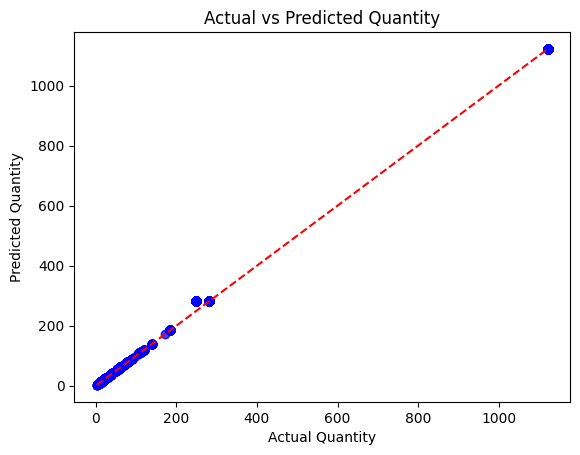

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_actual, y_pred, color='blue', alpha=0.5)
plt.plot([y_actual.min(), y_actual.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.show()

Checking our range of error

(array([2.541e+03, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.480e+02]),
 array([3.81469727e-05, 1.69988976e+00, 3.39974136e+00, 5.09959297e+00,
        6.79944458e+00, 8.49929619e+00, 1.01991478e+01, 1.18989994e+01,
        1.35988510e+01, 1.52987026e+01, 1.69985542e+01, 1.86984058e+01,
        2.03982574e+01, 2.20981091e+01, 2.37979607e+01, 2.54978123e+01,
        2.71976639e+01, 2.88975155e+01, 3.05973671e+01, 3.22972187e+01,
        3.39970703e+01]),
 <BarContainer object of 20 artists>)

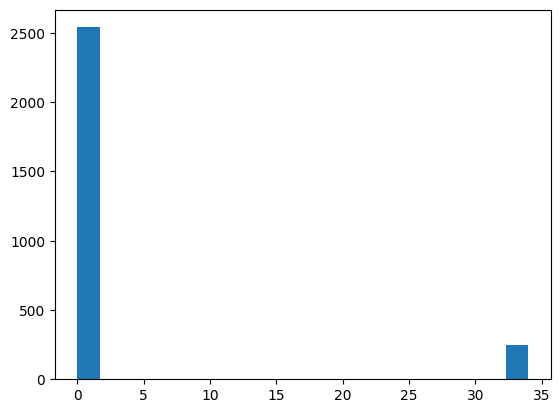

In [ ]:
err_hist=np.abs(y_actual - y_pred)
plt.hist(err_hist , bins=20)

Another Cross Validation

In [ ]:
# Split the dataset
first_half = [1,2,3,4,5,6]
second_half = [7,8,9,10,11,12]
selection1 = df[df['Month'].isin(first_half)]
selection2 = df[df['Month'].isin(second_half)]
# For the first part
X_train = selection1.drop("Quantity_per_FI_per_Month", axis=1)
y_train = selection1["Quantity_per_FI_per_Month"]

# For the second part
X_test = selection2.drop("Quantity_per_FI_per_Month", axis=1)

import xgboost as xgb

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict Quantity_per_FI_per_Month for the second part
y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[248.00436   93.98771   57.004246 ... 112.93614  112.91229   90.16909 ]
(4550,)


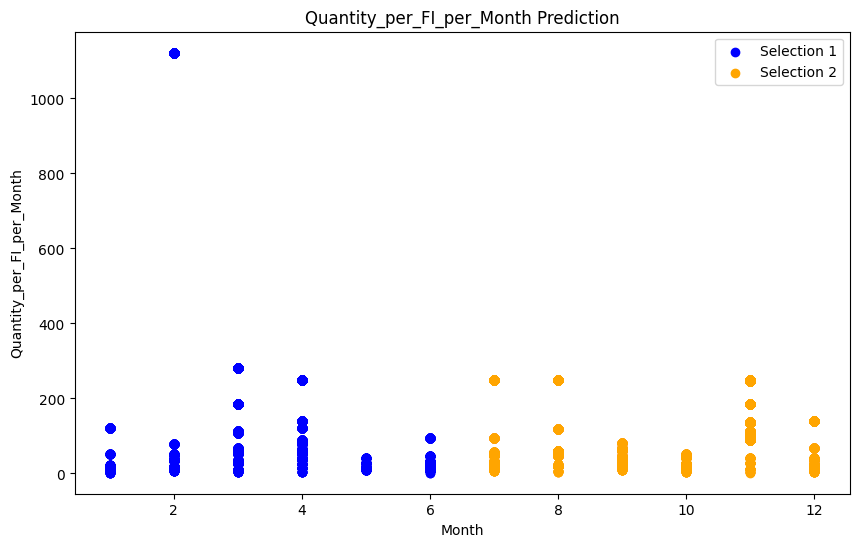

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
x_selection1 = selection1['Month']
y_selection1 = selection1['Quantity_per_FI_per_Month']
x_selection2 = selection2['Month']
y_selection2 = y_pred

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_selection1, y_selection1, color='blue', label='Selection 1')
plt.scatter(x_selection2, y_selection2, color='orange', label='Selection 2')
plt.xlabel('Month')
plt.ylabel('Quantity_per_FI_per_Month')
plt.title('Quantity_per_FI_per_Month Prediction')
plt.legend()

# Show the plot
plt.show()


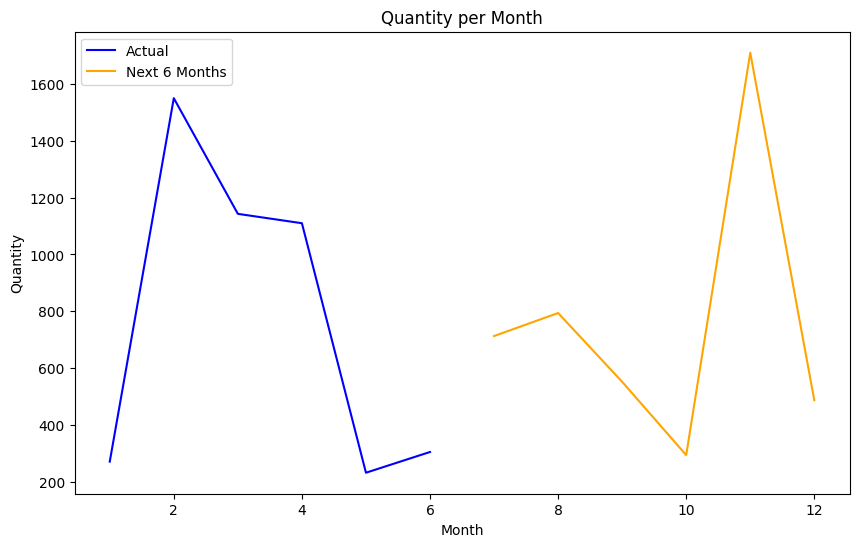

In [ ]:
import matplotlib.pyplot as plt

# Calculate the sum of Quantity_per_FI_per_Month for each month in selection1
sum_selection1 = selection1.groupby('Month')['Quantity_per_FI_per_Month'].count()

# Calculate the sum of Quantity_per_FI_per_Month for each month in selection2
sum_selection2 = selection2.groupby('Month')['Quantity_per_FI_per_Month'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sum_selection1.index, sum_selection1.values, color='blue', label='Actual')
plt.plot(sum_selection2.index, sum_selection2.values, color='orange', label='Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity per Month')
plt.legend()

plt.yscale('linear')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import *

# Extract the actual values of Quantity_per_FI_per_Month for the second part
y_actual = selection2["Quantity_per_FI_per_Month"]

# Calculate the mean squared error
mse = mean_squared_error(y_actual, y_pred)
mae=mean_absolute_error(y_actual, y_pred)
MAE=median_absolute_error(y_actual, y_pred)
score = r2_score(y_actual, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Square:",np.sqrt(mse))
print("Mean Absolute Error:",mae)
print("Median Absolute Error",MAE)
print("score:",score)

Mean Squared Error: 575.5279896602256
Root Mean Square: 23.990164435872998
Mean Absolute Error: 12.080135283679752
Median Absolute Error 2.8191070556640625
score: 0.9157616191395936


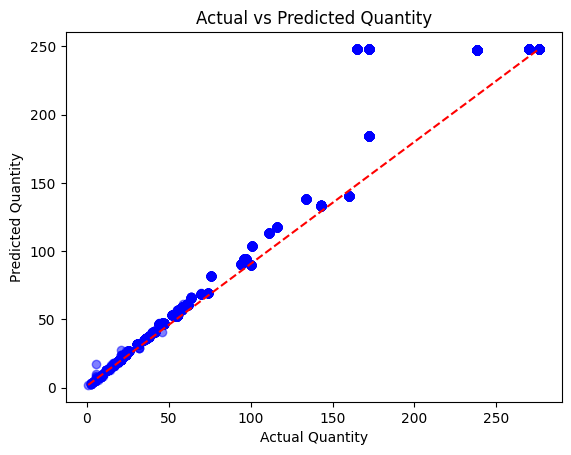

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_actual, y_pred, color='blue', alpha=0.5)
plt.plot([y_actual.min(), y_actual.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.show()

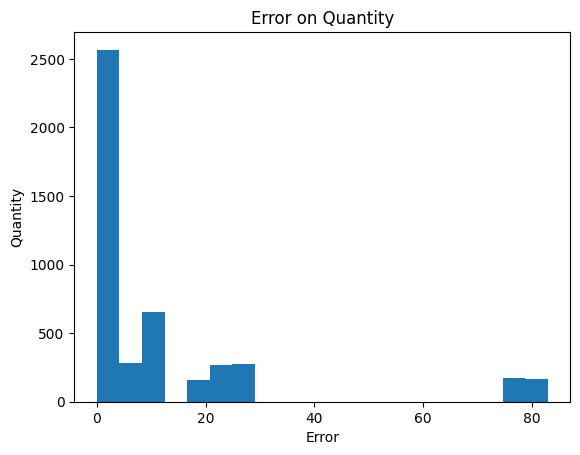

In [ ]:
err_hist2=np.abs(y_actual - y_pred)
plt.hist(err_hist2 , bins=20)
plt.xlabel('Error')
plt.ylabel('Quantity')
plt.title('Error on Quantity')
plt.show()

# Our predictions

In [ ]:
df

,Quantity,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month,Predictions_FI
0,1,15,4,58,371,36,1110,36.0
1,3,15,4,65,371,36,1110,36.0
2,1,4,4,29,984,140,1110,140.0
3,1,4,4,33,984,140,1110,140.0
4,1,4,4,19,984,140,1110,140.0
...,...,...,...,...,...,...,...,...
9156,1,1,4,13,2786,248,1110,248.0
9157,1,1,4,5,2786,248,1110,248.0
9158,1,1,4,3,2786,248,1110,248.0
9159,1,10,4,10,618,78,1110,78.0


Inverse Encoder

In [ ]:
df['Family_Item_Name']=label_encoder.inverse_transform(df['Family_Item_Name'])
df

,Quantity,Family_Item_Name,Month,QuantitySold_per_Article_per_Year,QuantitySold_per_FI_per_Year,Quantity_per_FI_per_Month,Total_Customers_per_Month,Predictions_FI
0,1,שמיכות,4,58,371,36,1110,36.0
1,3,שמיכות,4,65,371,36,1110,36.0
2,1,מגבות אקווה פיברו,4,29,984,140,1110,140.0
3,1,מגבות אקווה פיברו,4,33,984,140,1110,140.0
4,1,מגבות אקווה פיברו,4,19,984,140,1110,140.0
...,...,...,...,...,...,...,...,...
9156,1,Loungewear,4,13,2786,248,1110,248.0
9157,1,Loungewear,4,5,2786,248,1110,248.0
9158,1,Loungewear,4,3,2786,248,1110,248.0
9159,1,סאטן 220 בסיק,4,10,618,78,1110,78.0


Summary Table of predict quantity per FI per Month

In [ ]:
import pandas as pd

# Calculate the quantity of family items for each month in selection2
pivot_table_selection2 = selection2.pivot_table(index='Month', columns=df['Family_Item_Name'], values='Quantity_per_FI_per_Month', aggfunc='count',fill_value=0)
df_test6months=pivot_table_selection2
df_test6months



Family_Item_Name,100% פשתן,Loungewear,חלוקי אמבטיה אקווה פיברו,כריות,מגבות אקווה פיברו,מגבות חמם,מגבות מטבח,מגבות פרימיום,סאטן 220,סאטן 220 בסיק,סאטן 300,סדיני ג'רסי,פרקל 200,שטיחוני אמבטיה,שמיכות,שמיכת טטרה
Month,,,,,,,,,,,,,,,,
7,0,276,23,31,97,0,45,23,56,32,54,6,6,25,14,25
8,3,172,58,55,116,0,44,19,46,61,62,55,6,55,22,20
9,0,76,59,38,64,0,23,17,70,41,44,46,9,26,21,18
10,0,42,52,16,47,0,10,7,25,19,17,12,3,19,21,4
11,5,165,270,96,238,1,94,41,134,172,111,101,13,100,143,26
12,3,160,74,16,40,0,4,7,38,35,21,15,5,24,36,9


In [ ]:
import pandas as pd
# Creating a pivot table to summarize the predictions FI by month and Family_Item_Name
summary_df = pd.pivot_table(df, values='Predictions_FI', index='Month', columns='Family_Item_Name', aggfunc='count', fill_value=0)
summary_df

Family_Item_Name,100% פשתן,Loungewear,חלוקי אמבטיה אקווה פיברו,כריות,מגבות אקווה פיברו,מגבות חמם,מגבות מטבח,מגבות פרימיום,מגבת פרימיום,סאטן 220,סאטן 220 בסיק,סאטן 300,סדיני ג'רסי,פרקל 200,שטיחוני אמבטיה,שמיכות,שמיכת טטרה
Month,,,,,,,,,,,,,,,,,
1,2,122,23,4,51,0,6,5,2,9,5,5,11,2,17,7,0
2,16,1122,53,16,50,6,12,17,16,79,38,32,20,11,38,18,6
3,3,282,108,37,69,5,61,12,59,184,113,61,35,24,53,30,7
4,3,248,61,66,140,4,26,59,57,120,78,89,41,15,53,36,14
5,0,27,17,15,40,0,9,14,0,28,16,17,0,9,16,10,14
6,2,94,8,19,32,0,10,7,0,47,8,27,0,8,12,13,18
7,0,276,23,31,97,0,45,23,0,56,32,54,6,6,25,14,25
8,3,172,58,55,116,0,44,19,0,46,61,62,55,6,55,22,20
9,0,76,59,38,64,0,23,17,0,70,41,44,46,9,26,21,18


Export Table to csv/excel

In [ ]:
import pandas as pd

# Export the table to a new CSV file on your computer
export_path = '/content/Nautica-Home/FinalPred.csv'
summary_df.to_csv(export_path, index=False)
print(f"Table exported successfully to: {export_path}")


Table exported successfully to: /content/Nautica-Home/FinalPred.csv


# NHTable with Pred

In [ ]:
export_path = '/content/Nautica-Home/NHTableWithPred.csv'
df.to_csv(export_path, index=False)
print(f"Table exported successfully to: {export_path}")

Table exported successfully to: /content/Nautica-Home/NHTableWithPred.csv


# Nouvelle section